In [24]:
#import des librairie
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output
import matplotlib.colors as mcolors

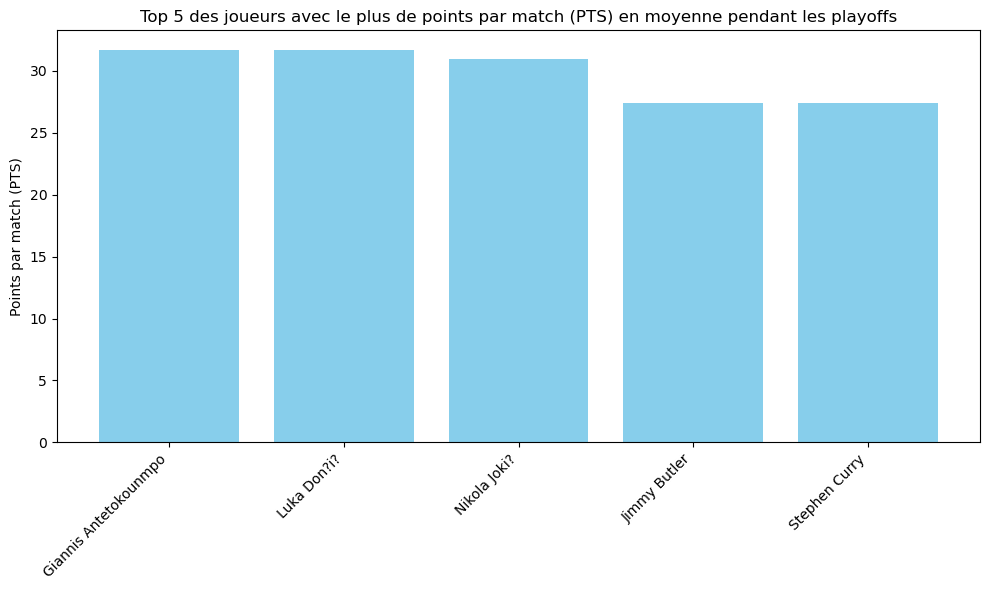

In [25]:
# Cellule TOP 5
data_playoffs = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", encoding='latin-1',sep=";")

# Sélection des cinq joueurs ayant inscrit le plus de points par match en moyenne pendant la saison régulière
top_players = data_playoffs.nlargest(5, 'PTS')

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_players['Player'], top_players['PTS'], color='skyblue')

# Ajout des titres et labels
plt.title('Top 5 des joueurs avec le plus de points par match (PTS) en moyenne pendant les playoffs')
plt.ylabel('Points par match (PTS)')

chemin_image = "5_meilleurs_scorer.png"
plt.savefig(chemin_image)

# Affichage du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

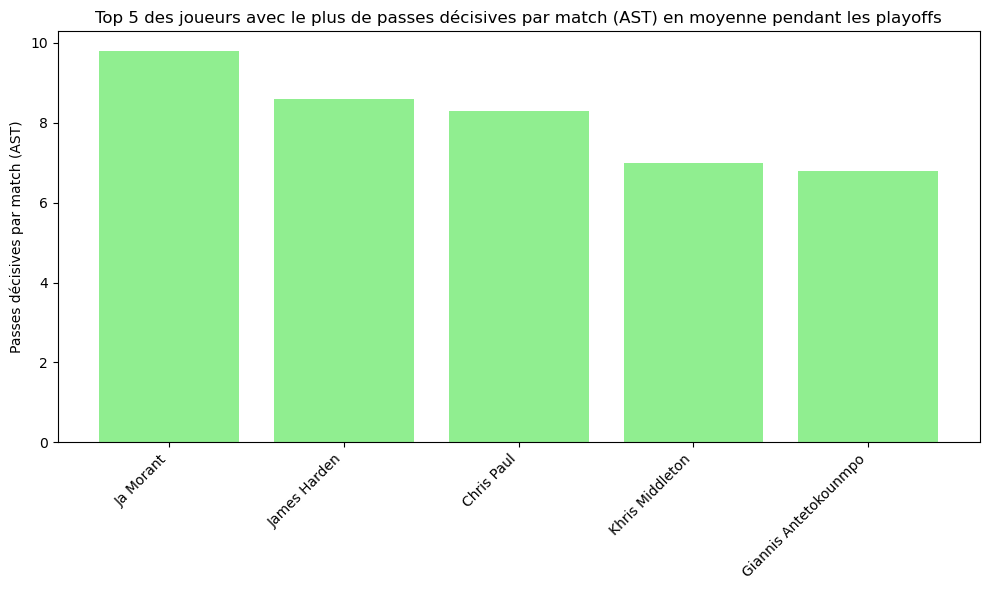

In [26]:
# Sélection des cinq joueurs ayant enregistré le plus grand nombre de passes décisives par match en moyenne pendant la saison régulière
top_players_ast = data_playoffs.nlargest(5, 'AST')

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_players_ast['Player'], top_players_ast['AST'], color='lightgreen')

# Ajout des titres et labels
plt.title('Top 5 des joueurs avec le plus de passes décisives par match (AST) en moyenne pendant les playoffs')
plt.ylabel('Passes décisives par match (AST)')


chemin_image = "5_meilleurs_passeur.png"
plt.savefig(chemin_image)

# Affichage du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

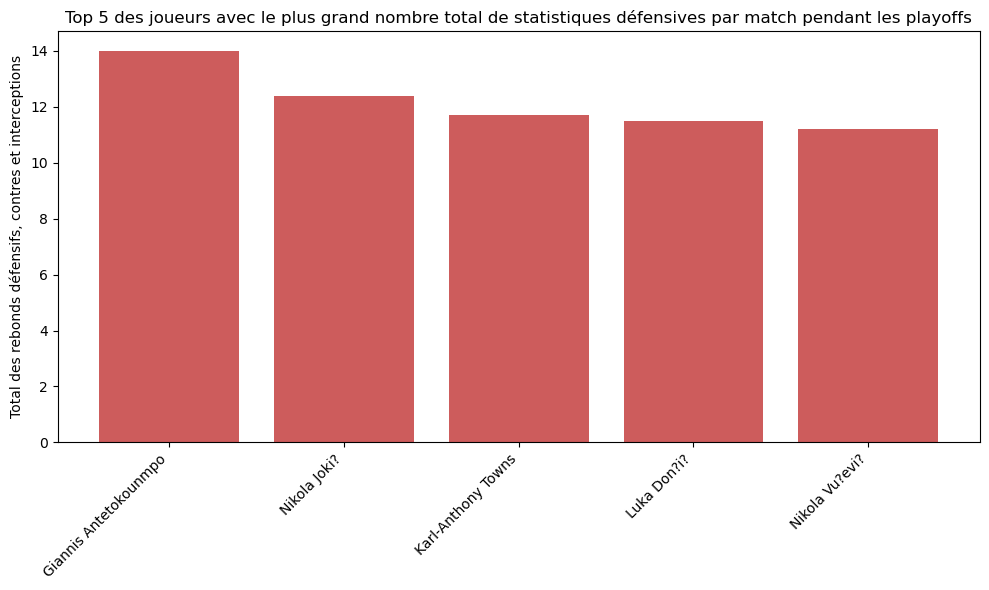

In [27]:
color_red = mcolors.CSS4_COLORS['indianred']

# Calcul de la somme des rebonds défensifs, des contres et des interceptions pour chaque joueur
data_playoffs['Total_Defense'] = data_playoffs['DRB'] + data_playoffs['BLK'] + data_playoffs['STL']

# Sélection des cinq joueurs ayant enregistré le plus grand nombre total de rebonds défensifs, contres et interceptions combinés en moyenne pendant la saison régulière
top_players_defense = data_playoffs.nlargest(5, 'Total_Defense')

# Création du graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(top_players_defense['Player'], top_players_defense['Total_Defense'], color=color_red)

# Ajout des titres et labels
plt.title('Top 5 des joueurs avec le plus grand nombre total de statistiques défensives par match pendant les playoffs')
plt.ylabel('Total des rebonds défensifs, contres et interceptions')

chemin_image = "5_meilleurs_def.png"
plt.savefig(chemin_image)

# Affichage du graphique
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Cellule Profil Pivot

#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']

for i in tableau1:
    meanspivot[i]=str(pivot.loc[:,i].mean())[0:5]
    meansarriere[i]=str(arriere_de_tir.loc[:,i].mean())[0:5]
    meansmeneur[i]=str(meneur.loc[:,i].mean())[0:5]
    meansailierf[i]=str(ailier_fort.loc[:,i].mean())[0:5]
    meansailier[i]=str(ailier.loc[:,i].mean())[0:5]
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())

#Affichage du graphe

r=pivot.select_dtypes(include=['number']).mean()
fig=px.line_polar(pivot,r,theta=['Rebonds défensifs : ' + meanspivot['DRB'],'Interceptions : ' + meanspivot['STL'],'Contres : ' + meanspivot['BLK'],'Fautes : ' + meanspivot['PF'],'Taux de tirs réussis : ' + meanspivot['FG%'],'Taux de tirs à 3 points réussis : ' + meanspivot['3P%'],'Taux de tirs à 2 points réussi : ' + meanspivot['2P%'],'Taux de lancers francs réussis : ' + meanspivot['FT%'],'Rebonds offensifs : ' + meanspivot['ORB'],'Passes décisives : ' + meanspivot['AST']],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_13920\2612433172.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [33]:
# Cellule Profil Arrière_de_tir

#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']

for i in tableau1:
    meanspivot[i]=str(pivot.loc[:,i].mean())[0:5]
    meansarriere[i]=str(arriere_de_tir.loc[:,i].mean())[0:5]
    meansmeneur[i]=str(meneur.loc[:,i].mean())[0:5]
    meansailierf[i]=str(ailier_fort.loc[:,i].mean())[0:5]
    meansailier[i]=str(ailier.loc[:,i].mean())[0:5]
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())

#Affichage du graphe

r=arriere_de_tir.select_dtypes(include=['number']).mean()
fig=px.line_polar(arriere_de_tir,r,theta=['Rebonds défensifs : ' + meansarriere['DRB'],'Interceptions : ' + meansarriere['STL'],'Contres : ' + meansarriere['BLK'],'Fautes : ' + meansarriere['PF'],'Taux de tirs réussis : ' + meansarriere['FG%'],'Taux de tirs à 3 points réussis : ' + meansarriere['3P%'],'Taux de tirs à 2 points réussi : ' + meansarriere['2P%'],'Taux de lancers francs réussis : ' + meansarriere['FT%'],'Rebonds offensifs : ' + meansarriere['ORB'],'Passes décisives : ' + meansarriere['AST']],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_13920\3535534106.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [35]:
# Cellule Profil Ailier
#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']

for i in tableau1:
    meanspivot[i]=str(pivot.loc[:,i].mean())[0:5]
    meansarriere[i]=str(arriere_de_tir.loc[:,i].mean())[0:5]
    meansmeneur[i]=str(meneur.loc[:,i].mean())[0:5]
    meansailierf[i]=str(ailier_fort.loc[:,i].mean())[0:5]
    meansailier[i]=str(ailier.loc[:,i].mean())[0:5]
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())

#Affichage du graphe

r=ailier.select_dtypes(include=['number']).mean()
fig=px.line_polar(ailier,r,theta=['Rebonds défensifs : ' + meansailier['DRB'],'Interceptions : ' + meansailier['STL'],'Contres : ' + meansailier['BLK'],'Fautes : ' + meansailier['PF'],'Taux de tirs réussis : ' + meansailier['FG%'],'Taux de tirs à 3 points réussis : ' + meansailier['3P%'],'Taux de tirs à 2 points réussi : ' + meansailier['2P%'],'Taux de lancers francs réussis : ' + meansailier['FT%'],'Rebonds offensifs : ' + meansailier['ORB'],'Passes décisives : ' + meansailier['AST']],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_13920\527833904.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [36]:
# Cellule Profil Meneur
#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']

for i in tableau1:
    meanspivot[i]=str(pivot.loc[:,i].mean())[0:5]
    meansarriere[i]=str(arriere_de_tir.loc[:,i].mean())[0:5]
    meansmeneur[i]=str(meneur.loc[:,i].mean())[0:5]
    meansailierf[i]=str(ailier_fort.loc[:,i].mean())[0:5]
    meansailier[i]=str(ailier.loc[:,i].mean())[0:5]
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())

#Affichage du graphe

r=meneur.select_dtypes(include=['number']).mean()
fig=px.line_polar(meneur,r,theta=['Rebonds défensifs : ' + meansmeneur['DRB'],'Interceptions : ' + meansmeneur['STL'],'Contres : ' + meansmeneur['BLK'],'Fautes : ' + meansmeneur['PF'],'Taux de tirs réussis : ' + meansmeneur['FG%'],'Taux de tirs à 3 points réussis : ' + meansmeneur['3P%'],'Taux de tirs à 2 points réussi : ' + meansmeneur['2P%'],'Taux de lancers francs réussis : ' + meansmeneur['FT%'],'Rebonds offensifs : ' + meansmeneur['ORB'],'Passes décisives : ' + meansmeneur['AST']],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_13920\4021091074.py:36: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [37]:
# Cellule Profil Ailier_fort
#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']

for i in tableau1:
    meanspivot[i]=str(pivot.loc[:,i].mean())[0:5]
    meansarriere[i]=str(arriere_de_tir.loc[:,i].mean())[0:5]
    meansmeneur[i]=str(meneur.loc[:,i].mean())[0:5]
    meansailierf[i]=str(ailier_fort.loc[:,i].mean())[0:5]
    meansailier[i]=str(ailier.loc[:,i].mean())[0:5]
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())

#Affichage du graphe

r=ailier_fort.select_dtypes(include=['number']).mean()
fig=px.line_polar(ailier_fort,r,theta=['Rebonds défensifs : ' + meansailierf['DRB'],'Interceptions : ' + meansailierf['STL'],'Contres : ' + meansailierf['BLK'],'Fautes : ' + meansailierf['PF'],'Taux de tirs réussis : ' + meansailierf['FG%'],'Taux de tirs à 3 points réussis : ' + meansailierf['3P%'],'Taux de tirs à 2 points réussi : ' + meansailierf['2P%'],'Taux de lancers francs réussis : ' + meansailierf['FT%'],'Rebonds offensifs : ' + meansailierf['ORB'],'Passes décisives : ' + meansailierf['AST']],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

C:\Users\louis\AppData\Local\Temp\ipykernel_13920\3362643321.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [38]:
# Cellule diagramme distance Steven Adams
#Prétraitements généraux

data_playoffs = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data_playoffs=data_playoffs.dropna().loc[:,['Player','Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]

#récupération du joueur

player_name=input("choose player")
data_player=data_playoffs[data_playoffs['Player']==player_name]
data_player=data_player.loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]
data_playoffs=data_playoffs.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]


#Divisions des données en fonction des postes

pivot = data_playoffs.loc[data_playoffs['Pos'] == 'C']
arriere_de_tir = data_playoffs.loc[data_playoffs['Pos'] == 'SG']
meneur = data_playoffs.loc[data_playoffs['Pos'] == 'PG']
ailier_fort = data_playoffs.loc[data_playoffs['Pos'] == 'PF']
ailier = data_playoffs.loc[data_playoffs['Pos'] == 'SF']

#Calcul des moyennes pour chaque poste
meanspivot={}
meansarriere={}
meansmeneur={}
meansailierf={}
meansailier={}

tableau2=[pivot,arriere_de_tir,meneur,ailier_fort,ailier]
tableau1 = ['DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']
    
#Normalisation des données

for j in tableau2:
    for i in tableau1:
        j[i]=(j[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())
        data_player[i]=(data_player[i]-data_playoffs[i].min())/(data_playoffs[i].max()-data_playoffs[i].min())



#Calcul de distances
    

def distance(joueur, poste):
    d=0
    for i in tableau1:
        d+=(joueur[i].mean()-poste[i].mean())**2
    d=np.sqrt(d)
    return d
    
r1=distance(data_player,ailier)
r2=distance(data_player,ailier_fort)
r3=distance(data_player,meneur)
r4=distance(data_player,pivot)
r5=distance(data_player,arriere_de_tir)
    
r=[1-r1,1-r2,1-r3,1-r4,1-r5]


#Affichage du graphe
    
fig=px.line_polar(r,r=r,theta=['ailier','ailier fort','meneur','pivot','arriere_de_tir'],line_close=True)
fig.update_traces(fill='toself')
fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False,
            range=[0, 1]
        )),
    showlegend=False,
)
fig.show()

choose playerSteven Adams


C:\Users\louis\AppData\Local\Temp\ipykernel_13920\2782178851.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\louis\Documents\anaconda\Lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



C:\Users\louis\AppData\Local\Temp\ipykernel_13920\2678142540.py:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



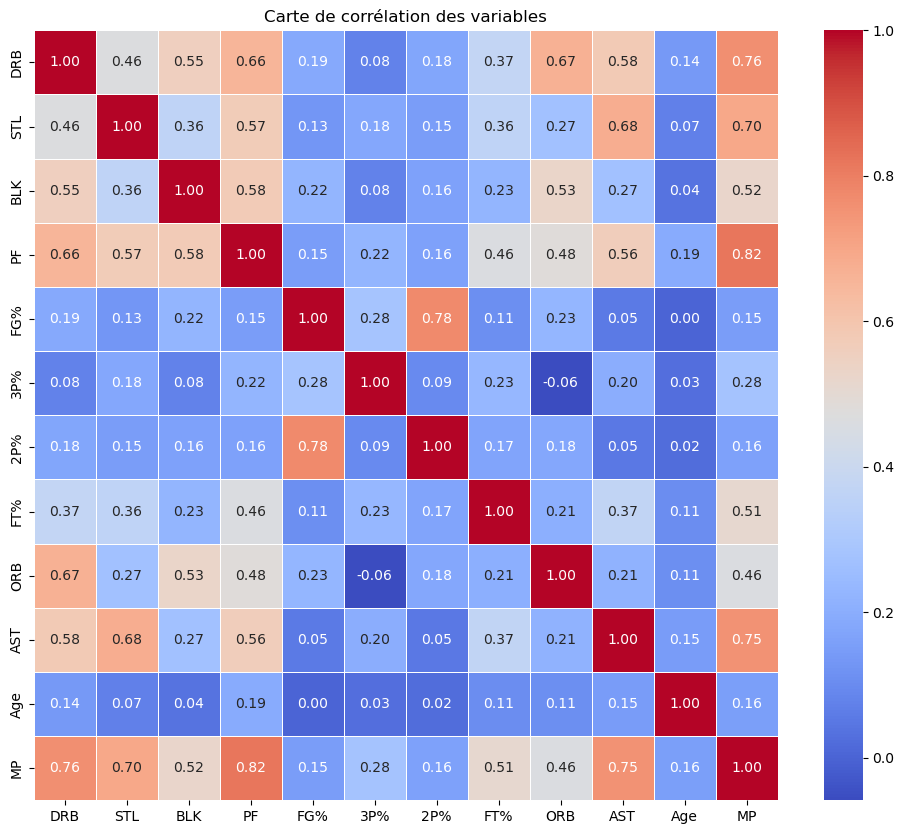

In [40]:
# Cellule heatmap

# Calculer la matrice de corrélation
data = pd.read_csv('2021-2022 NBA Player Stats - Playoffs.csv',encoding="latin-1",sep=";")
data=data.dropna().loc[:,['Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST','Age','MP']]


corr_matrix = data.corr()

# Créer une heatmap avec Seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Carte de corrélation des variables')
plt.show()

In [41]:
# Cellule comparaison regular/playoff

# Importation des données de la saison régulière
data_reguliere = pd.read_csv("2021-2022 NBA Player Stats - Regular.csv", encoding='latin-1', sep=";")
# Importation des données des playoffs
data_playoffs = pd.read_csv("2021-2022 NBA Player Stats - Playoffs.csv", encoding='latin-1', sep=";")

# Création des widgets
player_text = widgets.Text(value='Stephen Curry', description='Nom du joueur:', disabled=False)
update_button = widgets.Button(description="Comparer")
output = widgets.Output()

# Fonction pour mettre à jour les statistiques du joueur et afficher le graphique
def update_stats(button):
    with output:
        clear_output(wait=True)  # Efface le contenu de la sortie

        nom_joueur = player_text.value
        joueur_reguliere = data_reguliere[data_reguliere["Player"] == nom_joueur]
        joueur_playoffs = data_playoffs[data_playoffs["Player"] == nom_joueur]

        # Crée un nouveau graphique avec les nouvelles données du joueur
        plt.figure(figsize=(10, 6))
        variables = ["MP", "PTS", "3P", "2P", "FT", "ORB", "DRB", "AST", "STL", "BLK", "PF"]

        if not joueur_reguliere.empty and not joueur_playoffs.empty:
            joueur_reguliere = joueur_reguliere.iloc[0][variables]
            joueur_playoffs = joueur_playoffs.iloc[0][variables]

            x = range(len(variables))
            width = 0.35

            plt.bar(x, joueur_reguliere, width, label='Saison régulière')
            plt.bar([i + width for i in x], joueur_playoffs, width, label='Playoffs')

            # Ajout des étiquettes, titres et légendes
            plt.ylabel('Valeurs')
            plt.title(f'Comparaison des performances de {nom_joueur} entre la saison régulière et les playoffs')
            plt.xticks([i + width / 2 for i in x], variables)
            plt.legend()

        plt.show()

        plt.close()  # Ferme la figure précédente

# Associer la fonction de mise à jour au bouton
update_button.on_click(update_stats)

# Affichage des widgets
display(player_text)
display(update_button)
display(output)

Text(value='Stephen Curry', description='Nom du joueur:')

Button(description='Comparer', style=ButtonStyle())

Output()

In [42]:
data_regular = pd.read_csv('2021-2022 NBA Player Stats - Regular.csv',encoding="latin-1",sep=";")
data_regular = data_regular.dropna().loc[:,['Player','Pos','DRB','STL','BLK','PF','FG%','3P%','2P%','FT%','ORB','AST']]
data_regular.head(5)

,Player,Pos,DRB,STL,BLK,PF,FG%,3P%,2P%,FT%,ORB,AST
0,Precious Achiuwa,C,4.5,0.5,0.6,2.1,0.439,0.359,0.468,0.595,2.0,1.1
1,Steven Adams,C,5.4,0.9,0.8,2.0,0.547,0.000,0.548,0.543,4.6,3.4
2,Bam Adebayo,C,7.6,1.4,0.8,3.1,0.557,0.000,0.562,0.753,2.4,3.4
3,Santi Aldama,PF,1.7,0.2,0.3,1.1,0.402,0.125,0.560,0.625,1.0,0.7
4,LaMarcus Aldridge,C,3.9,0.3,1.0,1.7,0.550,0.304,0.578,0.873,1.6,0.9
